In [2]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import random
from helpers import read_from_csv, discretize, plot_data, result_to_df, plot_result_directed, plot_result_undirected, calculate_rates_directed, calculate_rates_undirected
from models import correlation_model, random_model

In [3]:
# read raw data from CSV file:
gene_df = read_from_csv('gene-data.csv')

# discretize data into 5 bins of gene-specific limits:
gene_df_disc = discretize(gene_df,5)

# true network structure:
# ground_truth[i,j]=1 -> directed edge between gene i and gene j
ground_truth = result_to_df(np.array([[0,1,0,0,0],
                                      [0,0,1,0,0],
                                      [0,0,0,0,1],
                                      [0,0,0,0,0],
                                      [1,1,0,1,0]]))

In [ ]:
gene_df.head()
gene_df_disc.head()

In [ ]:
plot_data(gene_df, discr=False)
plot_data(gene_df_disc, discr=True)

In [ ]:
corr_mat = correlation_model(gene_df, 0.75)

In [ ]:
plot_result_directed(corr_mat)
plot_result_directed(ground_truth)
tpr,fpr = calculate_rates_directed(df_to_try=corr_mat, df_true=ground_truth)
print('directed TPR = {:.3f} and FPR = {:.3f}'.format(tpr,fpr))

In [ ]:
plot_result_undirected(corr_mat)
plot_result_undirected(ground_truth)
tpr,fpr = calculate_rates_undirected(df_to_try=corr_mat, df_true=ground_truth)
print('undirected TPR = {:.3f} and FPR = {:.3f}'.format(tpr,fpr))

In [10]:
random_mat = random_model(threshold=0.5)
random_mat = random_model(n_edges=6)

directed TPR = 0.500 and FPR = 0.158


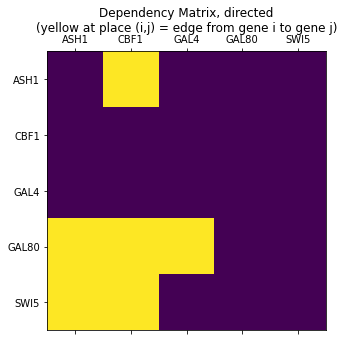

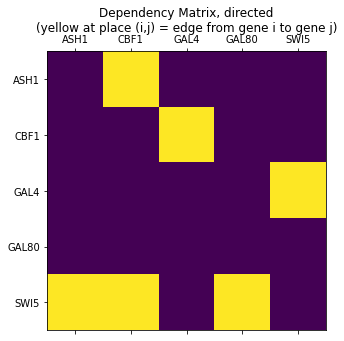

In [11]:
plot_result_directed(random_mat)
plot_result_directed(ground_truth)
tpr,fpr = calculate_rates_directed(df_to_try=random_mat, df_true=ground_truth)
print('directed TPR = {:.3f} and FPR = {:.3f}'.format(tpr,fpr))